In [24]:
# libraries 
import numpy as np
from numpy.random import normal


import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import random
import itertools

import os

import scipy
from scipy.integrate import simps as simps

# import functions
import sys
sys.path.append('../') 
from funs import *

from tqdm import tqdm

from pytz import timezone  # Import the pytz library for timezones
import datetime


In [25]:
def weekends_in_year(selected_year):
    weekends = []

    # Iterate through each day of the year
    start_date = datetime.date(selected_year, 1, 1)
    end_date = datetime.date(selected_year, 12, 31)
    current_date = start_date

    while current_date <= end_date:
        # Check if the current day is a Saturday (5) or Sunday (6)
        if current_date.weekday() in [5, 6]:
            weekends.append(datetime.datetime.combine(current_date, datetime.time(0, 0)).date())
        # Move to the next day
        current_date += datetime.timedelta(days=1)

    return weekends


def all_dates_in_year(selected_year):
    start_date = datetime.date(selected_year, 1, 1)
    end_date = datetime.date(selected_year, 12, 31)
    current_date = start_date
    dates = []
    while current_date <= end_date:
        dates.append(datetime.datetime.combine(current_date, datetime.time(0, 0)).date())
        current_date += datetime.timedelta(days=1)
    return dates

---

In [26]:
data = {}
for file in os.listdir('./data_treasure_bonds'):
    try:
        data.update({file[:-4] : pd.read_csv('./data_treasure_bonds/{}'.format(file)).sort_values(['Date', 'Time'])})
    except:
        None
data.keys()

dict_keys(['TY', 'FV', 'TU', 'US'])

---

In [27]:
df = data['US'].copy(); 
df['Date'] = pd.to_datetime(df['Date']).copy()
df['Time'] = pd.to_timedelta( df.Time + ':00')

df.loc[:,'Datetime'] =  df.Date + df.Time 

In [28]:
df

,Date,Time,Open,High,Low,Close,Volume,Tick Count,Datetime
52085,2002-01-01,0 days 19:05:00,101.53125,101.53125,101.53125,101.53125,0,0,2002-01-01 19:05:00
52086,2002-01-01,0 days 19:10:00,101.53125,101.53125,101.53125,101.53125,0,0,2002-01-01 19:10:00
52087,2002-01-01,0 days 19:15:00,101.53125,101.53125,101.53125,101.53125,0,0,2002-01-01 19:15:00
52088,2002-01-01,0 days 19:20:00,101.53125,101.53125,101.53125,101.53125,0,0,2002-01-01 19:20:00
52089,2002-01-01,0 days 19:25:00,101.53125,101.53125,101.53125,101.53125,0,0,2002-01-01 19:25:00
...,...,...,...,...,...,...,...,...,...
926948,2014-12-31,0 days 15:40:00,144.50000,144.50000,144.50000,144.50000,2,2,2014-12-31 15:40:00
926949,2014-12-31,0 days 15:45:00,144.50000,144.50000,144.46875,144.50000,7,4,2014-12-31 15:45:00
926950,2014-12-31,0 days 15:50:00,144.50000,144.50000,144.46875,144.46875,5,5,2014-12-31 15:50:00
926951,2014-12-31,0 days 15:55:00,144.46875,144.50000,144.46875,144.50000,4,4,2014-12-31 15:55:00


In [29]:
selected_year = 2011
df = df.loc[df.Datetime.dt.year == selected_year]
df.head()

# adjust by time shift
K=-7
df.loc[:,'Datetime'] = df.loc[:,'Datetime'].copy() - datetime.timedelta(hours=K)
df = df.sort_values('Datetime')

# # change timezone
# current_timezone = timezone('UTC')  # Replace 'UTC' with your current timezone
# target_timezone = timezone('America/New_York')  # Replace with your desired timezone
# # Convert the datetime column to the new timezone
# df['Datetime'] = df['Datetime'].dt.tz_localize(current_timezone).dt.tz_convert(target_timezone).copy()

In [30]:
set_of_dates = df.Datetime.dt.date.unique()

hours = df.Datetime.dt.hour
minutes = df.Datetime.dt.minute

weekdays = np.array([d.weekday() for d in set_of_dates])


opening_values = np.array([df.loc[df.Datetime.dt.date==date]['Open'].values 
                           for date in tqdm(set_of_dates)], dtype=object)

times = np.array([df.loc[df.Datetime.dt.date==date].Datetime.dt.time.values
                  for date in tqdm(set_of_dates)], dtype=object)

sizes = np.array([_.size for _ in opening_values]); 

  2%|▏         | 6/258 [00:00<00:04, 55.88it/s]

100%|██████████| 258/258 [00:04<00:00, 56.14it/s]


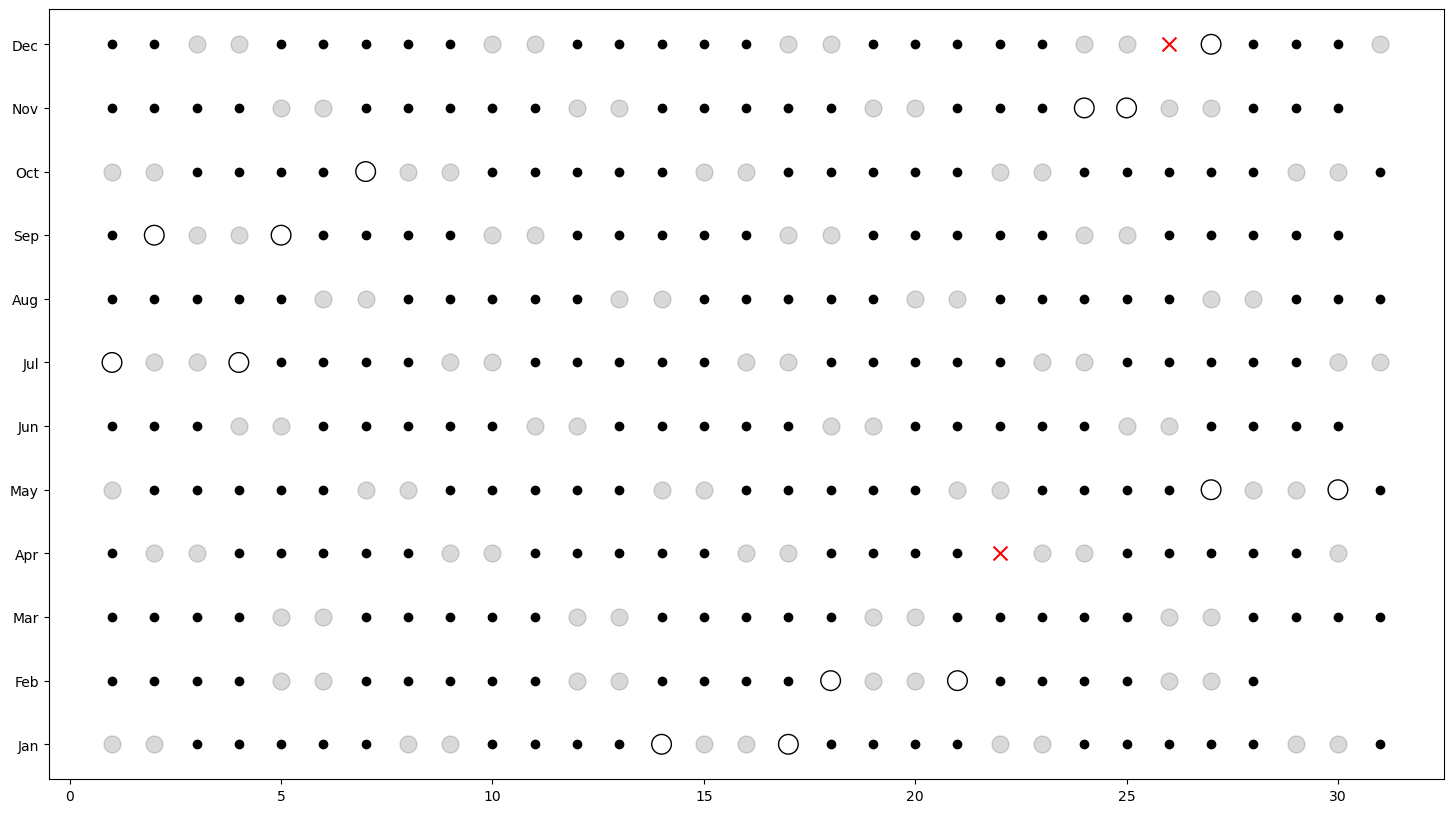

In [31]:
good_dates = []
fig,ax = plt.subplots(figsize = (18,10))
for d,s in zip(set_of_dates,sizes):
    if s == sizes.max():
        ax.scatter(d.day, d.month, c='k')
        good_dates.append(d)
    else:
        ax.scatter(d.day, d.month, facecolors='none', edgecolors='k', s = 200)
        
    
for d in weekends_in_year(selected_year):
    ax.scatter(d.day, d.month, c='k', s=150,alpha=.15)

all_dates = all_dates_in_year(selected_year)
empty_dates = set(all_dates).difference(set( list(weekends_in_year(selected_year)) + list(set_of_dates)  ))
for d in empty_dates:
    ax.scatter(d.day, d.month,marker='x', c='r', s=100)

ax.set_yticks(1+np.arange(12))
ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

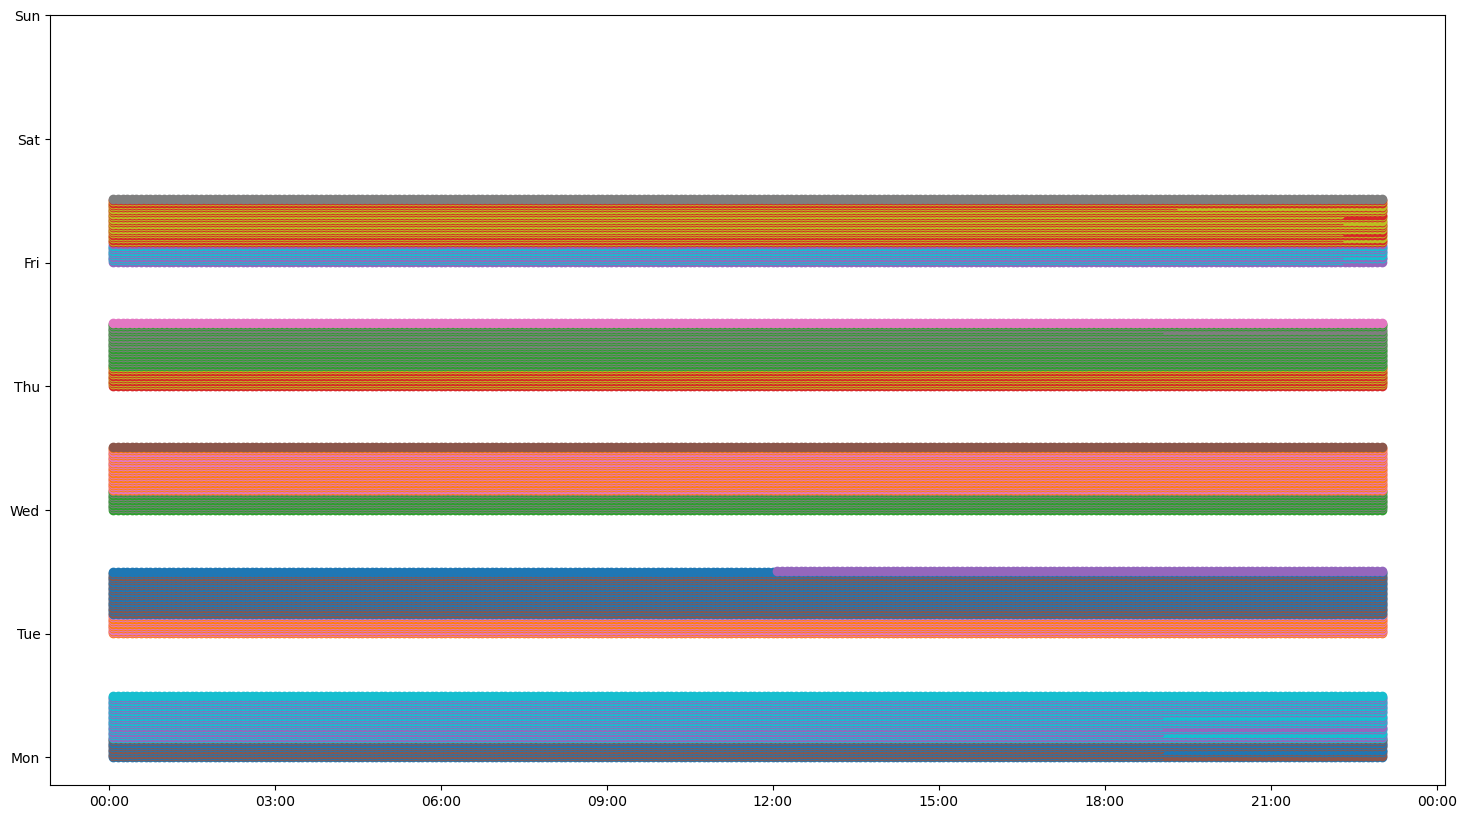

In [32]:
date = datetime.date(2023, 9, 20)
_times = np.array([ np.array([datetime.datetime.combine(date, t) for t in tt]) for tt in times], dtype=object)


fig,ax = plt.subplots(figsize = (18,10))
for i,(wd,t,v) in enumerate(zip(weekdays, _times, opening_values)):
    ax.scatter(t, (wd +2*1e-3*i)*np.ones(t.size))
ax.set_yticks(np.arange(7))
ax.set_yticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))

xticks = ax.get_xticks(); xticklabels = ax.get_xticklabels()
plt.show()

---

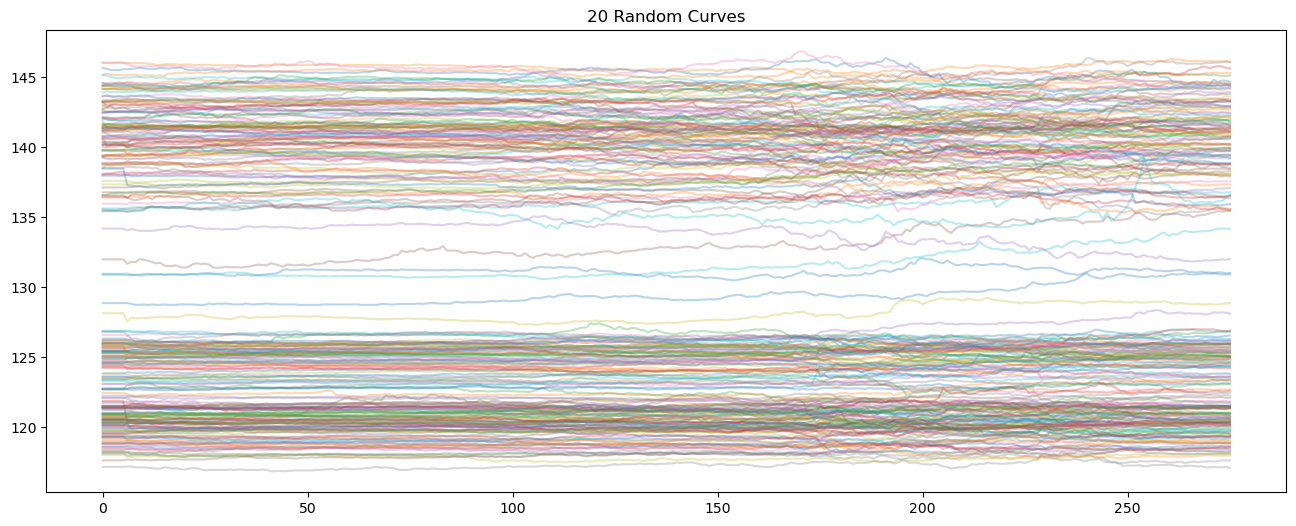

In [33]:
# plot 250 random curves
ixs = random.sample( list( np.arange(len(opening_values))), len(opening_values))
plt.figure(figsize=(16,6)); 
for ix in ixs:
    plt.plot(opening_values[ix],alpha =.3); 
plt.title('20 Random Curves'); plt.show()


---

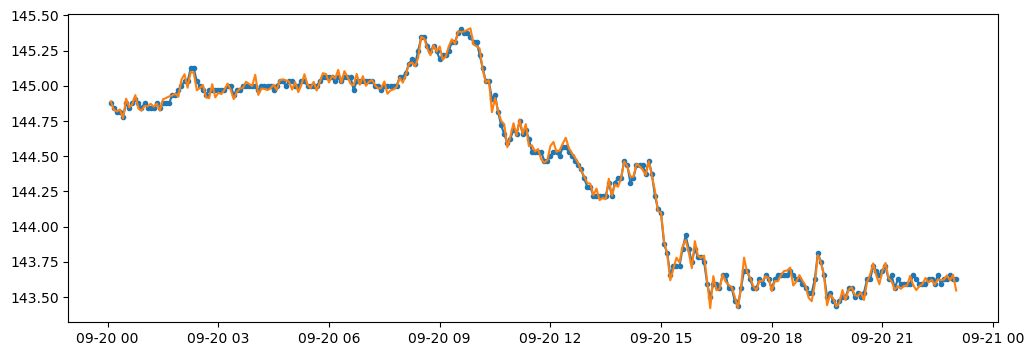

In [11]:
ix = 92
fig,ax= plt.subplots(figsize = (12,4))
ax.plot(_times[np.argsort(sizes)][ix], opening_values[np.argsort(sizes)][ix], '.-')

size = _times[np.argsort(sizes)][ix].size
_BM = np.random.multivariate_normal(mean = np.zeros(size), cov = np.eye(size)*(1/32)**2)
ax.plot(_times[np.argsort(sizes)][ix], opening_values[np.argsort(sizes)][ix] + _BM)

In [18]:
np.argmin([time.size for time in times[1:]])+1

12

In [20]:
times[11].shape

(267,)

In [22]:
times[1]

array([datetime.time(0, 5), datetime.time(0, 10), datetime.time(0, 15),
       datetime.time(0, 20), datetime.time(0, 25), datetime.time(0, 30),
       datetime.time(0, 35), datetime.time(0, 40), datetime.time(0, 45),
       datetime.time(0, 50), datetime.time(0, 55), datetime.time(1, 0),
       datetime.time(1, 5), datetime.time(1, 10), datetime.time(1, 15),
       datetime.time(1, 20), datetime.time(1, 25), datetime.time(1, 30),
       datetime.time(1, 35), datetime.time(1, 40), datetime.time(1, 45),
       datetime.time(1, 50), datetime.time(1, 55), datetime.time(2, 0),
       datetime.time(2, 5), datetime.time(2, 10), datetime.time(2, 15),
       datetime.time(2, 20), datetime.time(2, 25), datetime.time(2, 30),
       datetime.time(2, 35), datetime.time(2, 40), datetime.time(2, 45),
       datetime.time(2, 50), datetime.time(2, 55), datetime.time(3, 0),
       datetime.time(3, 5), datetime.time(3, 10), datetime.time(3, 15),
       datetime.time(3, 20), datetime.time(3, 25), datetim

In [11]:
opening_values[np.argsort(sizes)][-1][1:] -opening_values[np.argsort(sizes)][-1][:-1] 

array([ 0.03125,  0.03125, -0.03125, -0.03125,  0.     , -0.03125,
        0.     ,  0.03125, -0.03125,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.03125,  0.     , -0.0625 ,  0.03125,  0.03125,  0.     ,
       -0.03125,  0.03125,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.03125, -0.03125,  0.03125, -0.03125,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     , -0.03125,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.03125,  0.     ,  0.     ,  0.     , -0.03125, -0.03125,
        0.03125,  0.     , -0.03125,  0.     ,  0.     , -0.03125,
        0.     ,  0.     , -0.03125,  0.03125, -0.03125,  0.     ,
        0.     ,  0.     ,  0.03125,  0.     , -0.03125,  0.03

----

In [25]:
0.03125

0.03125

In [33]:
1/32

0.03125